In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def f(x,y):
    return x + 2*y

In [3]:
def Solucion(x):
    return -0.5*x - (1-np.exp(2*x))/4.

In [4]:
N = 10
t = np.linspace(0,1,N)


In [5]:
h = t[1] - t[0]

In [6]:
yext = Solucion(t)

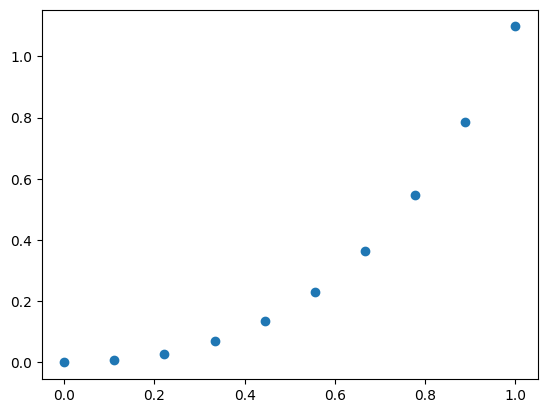

In [8]:
plt.scatter(t,yext)

In [9]:
def GetEuler(x,y,h):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        y[i] = y[i-1] + h*k1


In [10]:
y1 = np.zeros_like(t)
y1[0] = 0

In [11]:
GetEuler(t,y1,h)

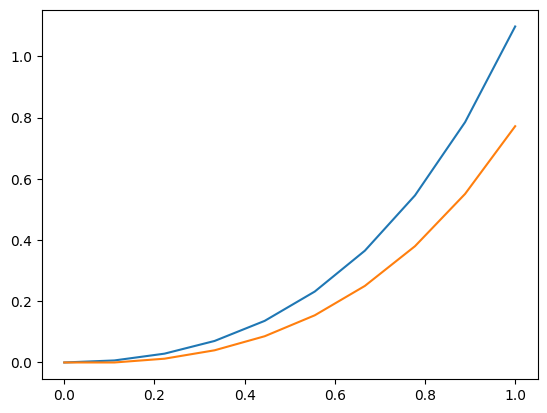

In [12]:
plt.plot(t,yext)
plt.plot(t,y1)

In [13]:
def fc(z):
    return 1j*z

In [14]:
def ComplexEuler():
    global theta
    global h_
    global f
    
    theta += h_
    f += h_*fc(f)

In [15]:
theta = 0.

N = 100
Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion1 = np.array([theta,f])

for i in range(N):
    ComplexEuler()
    Solucion1 = np.vstack([Solucion1, np.array([theta,f])])

In [16]:
Solucion1[-1,1]

(1.2177068419842307-0.010044860504615213j)

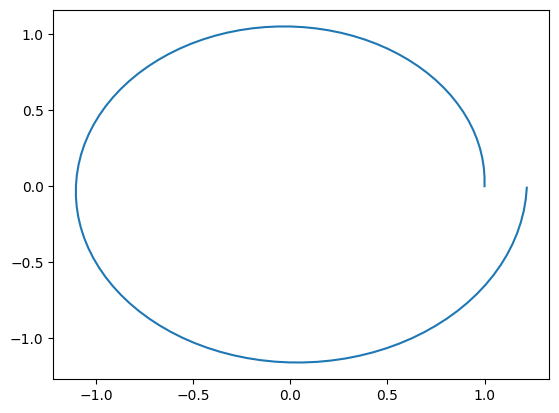

In [17]:
Re = np.real(Solucion1[:,1])
Im = np.imag(Solucion1[:,1])

plt.plot(Re,Im)

In [18]:
def GetEuler2(x,y,h):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+h,y[i-1] + h*k1)
        
        y[i] = y[i-1] + 0.5*h*(k1+k2)

In [19]:
def f(x,y):
    return x + 2*y

In [20]:
y2 = np.zeros_like(t)
y2[0] = 0.

In [21]:
GetEuler2(t,y2,h)

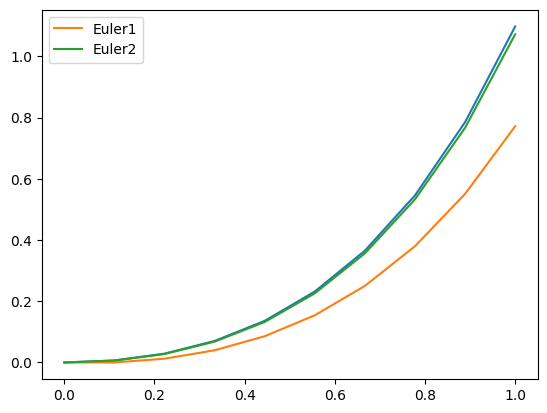

In [22]:
plt.plot(t,yext)
plt.plot(t,y1,label='Euler1')
plt.plot(t,y2,label='Euler2')
plt.legend()

In [23]:
def ComplexEuler2():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f+h_*k1)
    
    f += 0.5*h_*(k1+k2)

In [28]:
theta = 0.

N = 20
Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion2 = np.array([theta,f])

for i in range(N):
    ComplexEuler2()
    Solucion2 = np.vstack([Solucion2, np.array([theta,f])])

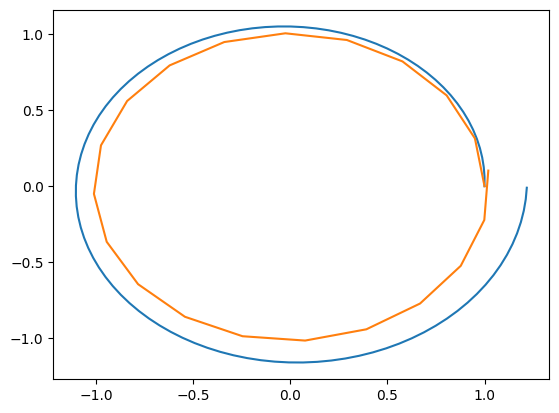

In [29]:
Re = np.real(Solucion1[:,1])
Im = np.imag(Solucion1[:,1])

Re2 = np.real(Solucion2[:,1])
Im2 = np.imag(Solucion2[:,1])


plt.plot(Re,Im)
plt.plot(Re2,Im2)

# Usando python scipy

In [30]:
def System(r,t,beta,gamma):
    
    dsdt = -beta*r[0]*r[1]
    didt =  beta*r[0]*r[1] - gamma*r[1]
    
    return [dsdt,didt]

In [31]:
t = np.linspace(0,30,100)

In [38]:
beta = 0.002
gamma = 0.5

In [39]:
r0 = [1000,1]
r = integrate.odeint( System, r0, t, args=(beta,gamma) )

# Implementacion Euler - Sistema de ecuaciones diferenciales

In [40]:
def f0(S,I,beta,gamma):
    return -beta*S*I

def f1(S,I,beta,gamma):
    return beta*S*I - gamma*I

In [41]:
def GetEulerSystem(f0,f1,r0,t):
    
    h = t[1] - t[0]
    
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    
    # Initial condition
    S[0] =r0[0]
    I[0] =r0[1]
    
    # Vectorizacion de las pendientes
    K1 = np.zeros(2)
    
    for i in range(1,len(t)):
        
        K1[0] = f0(S[i-1],I[i-1],beta,gamma)
        K1[1] = f1(S[i-1],I[i-1],beta,gamma)
        
        S[i] = S[i-1] + h*K1[0]
        I[i] = I[i-1] + h*K1[1]
        
    return S,I

In [42]:
S1,I1 = GetEulerSystem(f0,f1,r0,t)

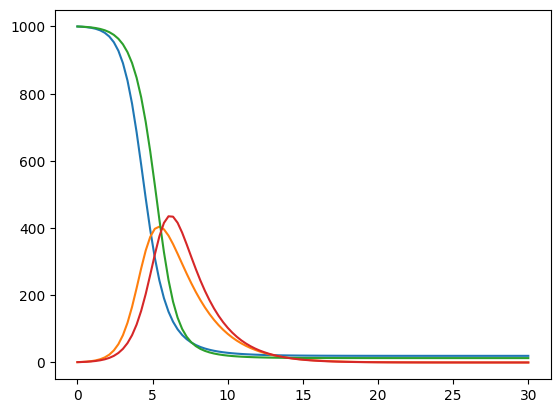

In [45]:
plt.plot(t,r[:,0])
plt.plot(t,r[:,1])
plt.plot(t,S1,label='Nuestro - malisimo')
plt.plot(t,I1,label='Nuestro - malisimo')